In [82]:
import numpy as np
import pandas as pd
import os


In [83]:
def readStress(cwd):
    fileNames = os.listdir(cwd)
    if not ('1.csv' in fileNames and '2.csv' in fileNames and '3.csv' in fileNames):
        raise ValueError('No files')
    sigma1 = pd.read_csv(os.path.join(cwd, '1.csv')).values[:, 1] * 1000
    sigma2 = pd.read_csv(os.path.join(cwd, '2.csv')).values[:, 1] * 1000
    sigma3 = pd.read_csv(os.path.join(cwd, '3.csv')).values[:, 1] * 1000
    #
    
    #sigma1 = sigma1[np.where(~np.isnan(sigma1))].reshape(-1, 2)[:, 1] * 1000
    #sigma2 = sigma2[np.where(~np.isnan(sigma2))].reshape(-1, 2)[:, 1] * 1000
    #sigma3 = sigma3[np.where(~np.isnan(sigma3))].reshape(-1, 2)[:, 1] * 1000
    #
   
    if not sigma1.shape == sigma2.shape and sigma2.shape == sigma3.shape:
        raise ValueError('Not Equit')
    return sigma1, sigma2 , sigma3

In [84]:
sigma1, sigma2, sigma3 = readStress('/Volumes/Install mac/static shear')

In [85]:
def devInvarient2(sigma1, sigma2, sigma3):
    if np.any(np.isnan(sigma1)):
        print(np.where(np.isnan(sigma1)))
        if np.any(np.isnan(sigma2)):
            print(np.where(np.isnan(sigma2)))
            if np.any(np.isnan(sigma3)):
                print(np.where(np.isnan(sigma3)))
        notnan1 = np.where(~np.isnan(sigma1))
        sigma1, sigma2, sigma3 = sigma1[notnan1], sigma2[notnan1], sigma3[notnan1]
        notnan2 = np.where(~np.isnan(sigma2))
        sigma1, sigma2, sigma3 = sigma1[notnan2], sigma2[notnan2], sigma3[notnan2]
        notnan3 = np.where(~np.isnan(sigma3))
        sigma1, sigma2, sigma3 = sigma1[notnan3], sigma2[notnan3], sigma3[notnan3]
    
    #if np.any(sigma1) or np.any(sigma2) or np.any(sigma3):
    #    raise ValueError('non')
    
    c1 = np.power(sigma1 - sigma2, 2)
    c2 = np.power(sigma2 - sigma3, 2)
    c3 = np.power(sigma1 - sigma3, 2)
    
    #print(c1, c2 ,c3)
    J2 = (c1 + c2 + c3) / 6
    if np.any(np.isnan(J2)):
        raise ValueError('Nan Error')
    return J2


J2 = devInvarient2(sigma1, sigma2, sigma3)
J2

array([     0.        ,      0.        ,      0.        , ...,
       332303.22443131, 332315.26182974, 332322.87710076])

In [86]:
def vonMises(J2):
    J2
    return np.sqrt(3 * J2)

vm = vonMises(J2)

In [87]:
def hydroPressure(sigma1, sigma2, sigma3):
    I1_3 = (sigma1 + sigma2 + sigma3)
    return I1_3 / 3
hp = hydroPressure(sigma1, sigma2, sigma3)

In [88]:
def triaxaility(hydroPressure, vonMises):
    
    tri = hydroPressure / vonMises
    tri[np.where(np.isnan(tri))] = 0
    tri[np.where(np.isinf(tri))] = 0
    return tri
tri = triaxaility(hp, vm)
tri

/Users/aaron/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/aaron/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


array([0.        , 0.        , 0.        , ..., 0.35409454, 0.35421567,
       0.35433613])

In [89]:
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

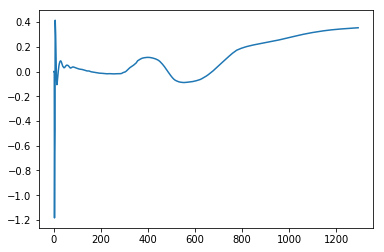

In [90]:
plt.plot(tri)

In [91]:
def devInvarient3(sigma1, sigma2, sigma3):
    hp = hydroPressure(sigma1, sigma2, sigma3)
    devSig1 = sigma1 - hp
    devSig2 = sigma2 - hp
    devSig3 = sigma3 - hp
    J3 = devSig1 * devSig2 * devSig3
    return J3
J3 = devInvarient3(sigma1, sigma2, sigma3)
J3

array([       0.        ,        0.        ,        0.        , ...,
       61236011.87678879, 61251802.78691454, 61266015.28403581])

In [92]:
def lodeParameter(sigma1, sigma2, sigma3):
    J2 = devInvarient2(sigma1, sigma2, sigma3)
    J3 = devInvarient3(sigma1, sigma2, sigma3)
    vm = vonMises(J2)
    lp = -27/2*J3 / np.power(vm, 3)
    lp[np.where(np.isnan(lp))] = 0
    lp[np.where(np.isinf(lp))] = 0
    return lp
lp = lodeParameter(sigma1, sigma2, sigma3)

/Users/aaron/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


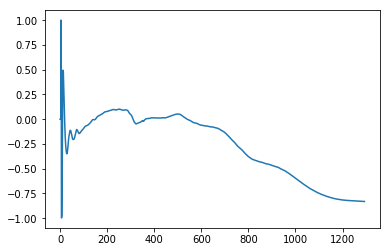

In [93]:
plt.plot(lp)

In [101]:
df = pd.DataFrame(np.hstack([tri.reshape(-1,1), lp.reshape(-1,1)]), columns=['TRI', 'LP'])
df.to_excel('/Volumes/Install mac/static shear/res.xlsx')